In [ ]:
# Porte SWAP :
#
# La porte agit sur deux qubits
# La porte swap intervertit deux qubits. En respectant les bases |00⟩,|01⟩,|10⟩,|11⟩ elle est représentée par la matrice :
#
#      
# SWAP =  | 1 0 0 0 |
#         | 0 0 1 0 |
#         | 0 1 0 0 |
#         | 0 0 0 1 |
#
# La matrice de passage est :
#
#
# P = | 0 1 0  0 |
#     | 1 0 0 -1 |
#     | 1 0 0  1 |
#     | 0 0 1  0 |
#
# Suivant la matrice : diag(1,1,-1,-1)
#

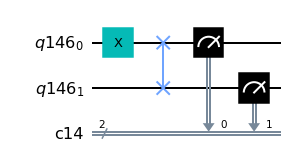

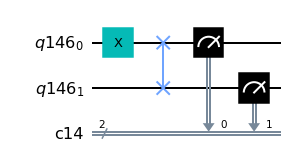

In [34]:
import numpy as np
from qiskit import(
QuantumCircuit,
ClassicalRegister,
QuantumRegister,
execute,
BasicAer)

import matplotlib as ptl

q = QuantumRegister(2)
q3 = QuantumRegister(3)
c = ClassicalRegister(2)
c3 = ClassicalRegister(3)

# quantum circuit to make a Bell state
bell = QuantumCircuit(q,c)
bell.x(q[0])
bell.swap(1,0)
bell.measure(q,c)

bell.draw(output='mpl')

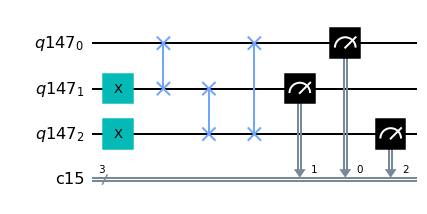

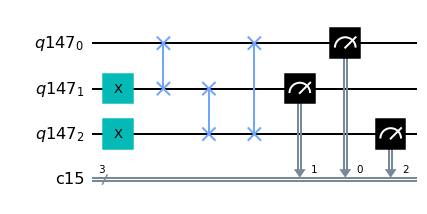

In [35]:
bell2 = QuantumCircuit(q3,c3)
bell2.x([q3[1], q3[2]])
bell2.swap(0,1)
bell2.swap(1,2)
bell2.swap(0,2)
bell2.measure(q3,c3)

bell2.draw(output='mpl')

In [36]:
# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = execute(bell, backend, shots=1000).result()
counts  = result.get_counts(bell)
print(counts)

{'10': 1000}


In [37]:
# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = execute(bell2, backend, shots=1000).result()
counts2  = result.get_counts(bell2)
print(counts2)

{'110': 1000}


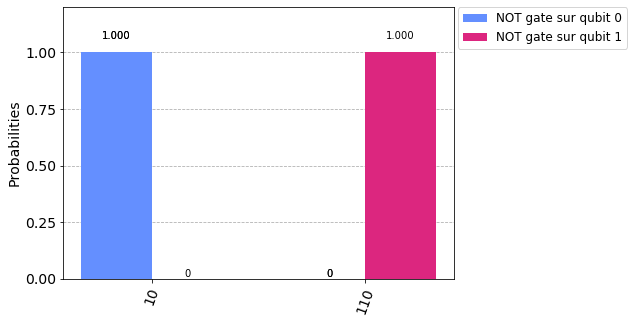

In [38]:
from qiskit.visualization import plot_histogram

hist = plot_histogram([counts, counts2], legend=['NOT gate sur qubit 0', 'NOT gate sur qubit 1'])

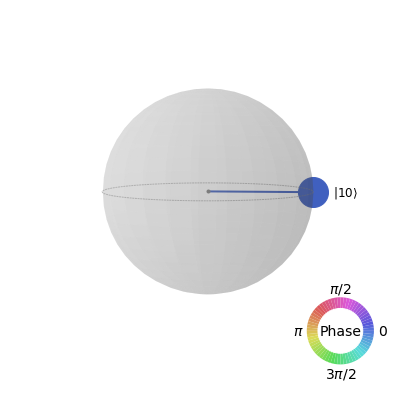

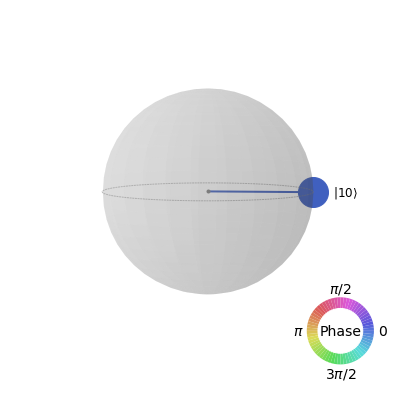

In [39]:
from qiskit.visualization import plot_state_qsphere
# execute the quantum circuit
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)
plot_state_qsphere(psi)

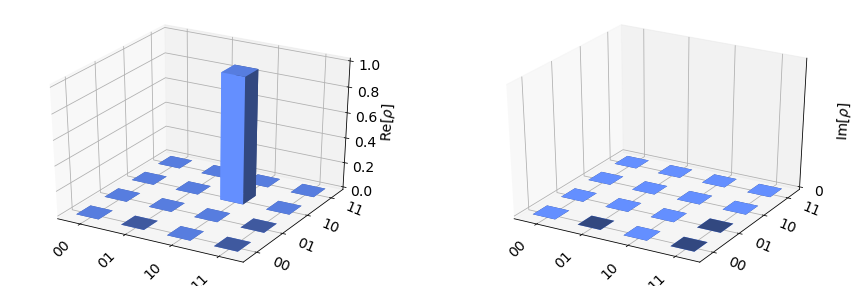

In [40]:
from qiskit.visualization import plot_state_city

plot_state_city(psi)